In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [20]:

class Model(nn.Module):
  def __init__(self, in_features=13, h1=8, h2=9, out_features=2):
    super().__init__() 
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [21]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of model
model = Model()

In [22]:
ds = pd.read_csv('api_call_frequency.csv')

In [23]:
df = ds[['RegQueryValueExA', 'FindFirstFileExW', 'RegCreateKeyExW', 'RegOpenKeyExA', 'SetFileAttributesW', 'CreateRemoteThread', 'NtOpenSection', 'RegSetValueExW', 'CreateDirectoryW', 'GetVolumePathNameW', 'CryptProtectMemory', 'NtFreeVirtualMemory', 'setsockopt', 'label']]

In [24]:
df.shape

(3083, 14)

In [25]:

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_values = X.values 
y_values = y.values

X_train, X_test, ytrain, ytest = train_test_split(X_values, y_values, test_size=0.2, random_state=42)

In [32]:
X_train.shape

torch.Size([2466, 13])

In [33]:
X_test.shape

torch.Size([617, 13])

In [26]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [27]:
y_train = torch.LongTensor(ytrain)
y_test = torch.LongTensor(ytest)

In [28]:

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [29]:

epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep Track of our losses
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # Do some back propagation: take the error rate of forward propagation and feed it back
  # thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 8.546664237976074
Epoch: 10 and loss: 0.6669209599494934
Epoch: 20 and loss: 0.4759438931941986
Epoch: 30 and loss: 0.33927997946739197
Epoch: 40 and loss: 0.26291730999946594
Epoch: 50 and loss: 0.21879145503044128
Epoch: 60 and loss: 0.1836615353822708
Epoch: 70 and loss: 0.15923872590065002
Epoch: 80 and loss: 0.14344698190689087
Epoch: 90 and loss: 0.13415800034999847


In [34]:
y_pred.dtype

torch.float32

Text(0.5, 0, 'epoch')

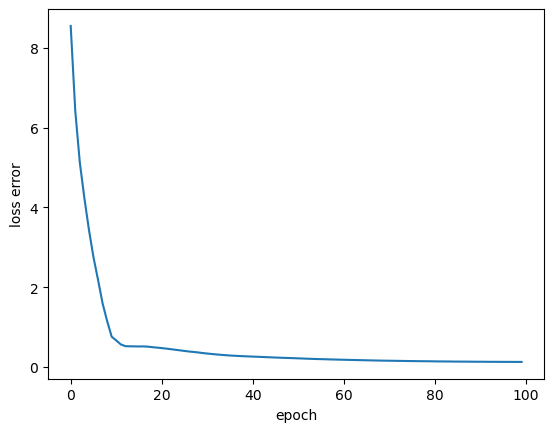

In [30]:
plt.plot(range(epochs), losses)
plt.ylabel('loss error')
plt.xlabel('epoch')

In [36]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')
     

We got 598 correct!
